<a href="https://colab.research.google.com/github/Fatihmaull/regressionAnalysisBTCtoETH/blob/main/BTC_correlation_to_ETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Upload file CSV ke Colab
from google.colab import files

print("Silakan upload file BTC dan ETH (.csv)")
uploaded = files.upload()



Silakan upload file BTC dan ETH (.csv)


Saving BTC-USD (2014-2024).csv to BTC-USD (2014-2024).csv
Saving ETH-USD (2017-2024).csv to ETH-USD (2017-2024).csv


In [ ]:
# Langkah 2: Import pustaka yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Baca dan gabungkan dataset
btc = pd.read_csv("BTC-USD (2014-2024).csv")[['Date', 'Close']].rename(columns={'Close': 'BTC_Close'})
eth = pd.read_csv("ETH-USD (2017-2024).csv")[['Date', 'Close']].rename(columns={'Close': 'ETH_Close'})

btc['Date'] = pd.to_datetime(btc['Date'])
eth['Date'] = pd.to_datetime(eth['Date'])

# Gabungkan berdasarkan tanggal
merged = pd.merge(btc, eth, on='Date', how='inner')
merged.head()


,Date,BTC_Close,ETH_Close
0,2017-11-10,6618.140137,299.252991
1,2017-11-11,6357.600098,314.681000
2,2017-11-12,5950.069824,307.907990
3,2017-11-13,6559.490234,316.716003
4,2017-11-14,6635.750000,337.631012


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=merged)

https://docs.google.com/spreadsheets/d/1ZlJ_DWGgbc0qxPwu5PKecDE7SaeF5ClLCQSvcyRdvUQ/edit#gid=0


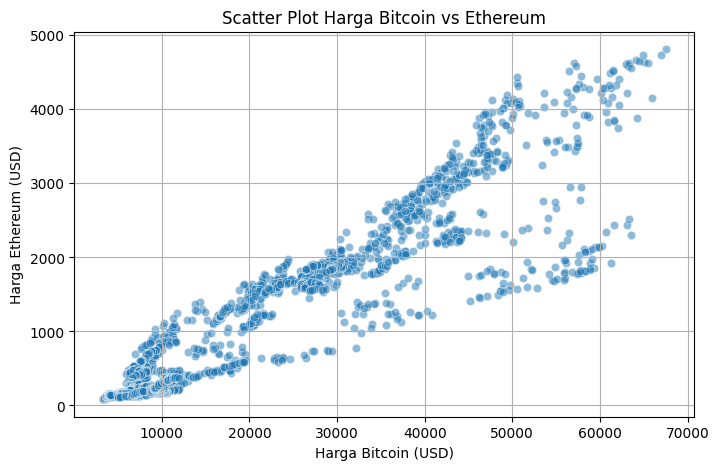

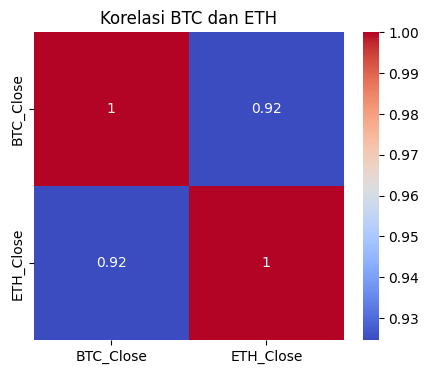

In [ ]:
# Visualisasi Scatter Plot dan Korelasi
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='BTC_Close', y='ETH_Close', alpha=0.5)
plt.title("Scatter Plot Harga Bitcoin vs Ethereum")
plt.xlabel("Harga Bitcoin (USD)")
plt.ylabel("Harga Ethereum (USD)")
plt.grid(True)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(5,4))
sns.heatmap(merged[['BTC_Close', 'ETH_Close']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi BTC dan ETH")
plt.show()


In [ ]:
# Analisis Regresi Linier Sederhana (OLS)

# Sebelum menjalankan regresi, periksa dan hapus baris dengan nilai NaN atau inf
# di kolom yang akan digunakan (BTC_Close dan ETH_Close)
merged_cleaned = merged.dropna(subset=['BTC_Close', 'ETH_Close']).replace([float('inf'), float('-inf')], float('nan')).dropna(subset=['BTC_Close', 'ETH_Close'])

X = sm.add_constant(merged_cleaned['BTC_Close'])  # Tambahkan konstanta (intercept)
y = merged_cleaned['ETH_Close']

# Pastikan tidak ada lagi NaN atau inf sebelum memanggil OLS
if X.isnull().values.any() or y.isnull().values.any():
    print("Warning: NaN values still present in X or y after cleaning.")
elif (X == float('inf')).values.any() or (X == float('-inf')).values.any() or (y == float('inf')).values.any() or (y == float('-inf')).values.any():
     print("Warning: Infinite values still present in X or y after cleaning.")
else:
    model = sm.OLS(y, X).fit()
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              ETH_Close   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 1.332e+04
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        17:21:29   Log-Likelihood:                -16912.
No. Observations:                2263   AIC:                         3.383e+04
Df Residuals:                    2261   BIC:                         3.384e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -159.2822     15.137    -10.523      0.0